In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Iman Noor**
---
# **Clustering (KMeans)**
- Clustering is an unsupervised machine learning technique used to group similar data points together based on their features.

"`K-Means Clustering` is an Unsupervised Machine Learning algorithm, which groups the unlabeled dataset into different clusters."
- KMeans is a popular clustering algorithm that partitions a dataset into k clusters, where each data point belongs to the cluster with the nearest mean.

- `Unsupervised Machine Learning` is the process of teaching a computer to use unlabeled, unclassified data and enabling the algorithm to operate on that data without supervision.

### **Algorithm**
1. First, we randomly initialize k points, called means or cluster centroids.
2. We categorize each item to its closest mean, and we update the mean’s coordinates, which are the averages of the items categorized in that cluster so far.
3. We repeat the process for a given number of iterations and at the end, we have our clusters.

## **Data Preparation**

In [2]:
import numpy as np
import pandas as pd

## **Student Clustering**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student_clustering.csv')
print('Shape of data is: ', df.shape)
df.head()

Shape of data is:  (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [4]:
import matplotlib.pyplot as plt

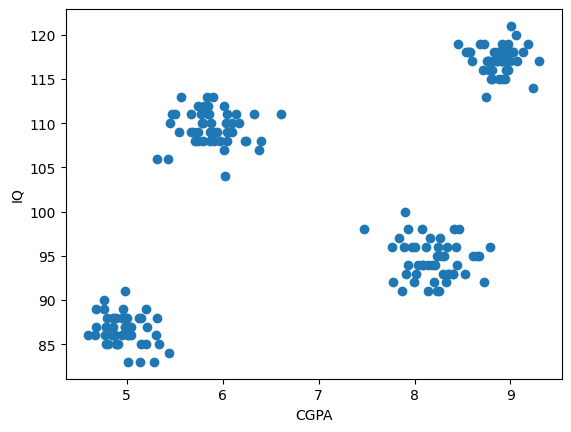

In [5]:
plt.scatter(df['cgpa'], df['iq'])
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.show();

In [6]:
from sklearn.cluster import KMeans

### **Calculating WCSS for KMeans Clustering**

- `wcss = []`: An empty list to store the WCSS values for each number of clusters.
- `for i in range(1, 11)`: A loop that iterates over the range of cluster numbers from 1 to 10.
- `km = KMeans(n_clusters=i)`: Initializes the KMeans algorithm with `i` clusters.
- `km.fit_predict(df)`: Fits the KMeans model to the data `df` and predicts the cluster assignments for each data point.
- `wcss.append(km.inertia_)`: Appends the WCSS value (inertia) of the fitted model to the `wcss` list.

The **WCSS** value measures the sum of squared distances between each data point and the centroid of its assigned cluster. By calculating the WCSS for different numbers of clusters, we can analyze the values to determine the optimal number of clusters, often using the "elbow method."

In [7]:
wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [8]:
wcss

[29957.898287999997,
 4184.141269999999,
 2364.0055834200834,
 681.9696600000001,
 514.1616803171117,
 388.8524026875981,
 295.4391895943191,
 234.48687343199217,
 214.86149229117615,
 171.40590752168507]

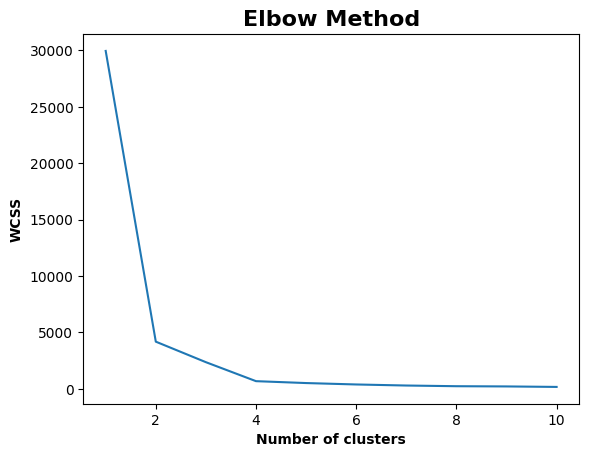

In [9]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method', weight='bold', fontsize=16)
plt.xlabel('Number of clusters', weight='bold')
plt.ylabel('WCSS', weight='bold')
plt.show();

In [10]:
X = df.iloc[:, :].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
y_means

array([2, 3, 0, 0, 3, 3, 0, 1, 3, 0, 2, 3, 0, 2, 3, 0, 3, 0, 3, 3, 0, 2,
       0, 2, 2, 0, 2, 1, 0, 3, 1, 3, 1, 3, 0, 0, 1, 3, 2, 3, 2, 0, 0, 2,
       1, 1, 0, 3, 1, 3, 2, 2, 1, 0, 1, 3, 3, 1, 3, 1, 3, 0, 0, 1, 2, 1,
       0, 2, 3, 0, 3, 1, 0, 2, 3, 1, 3, 1, 2, 0, 0, 1, 3, 2, 1, 2, 1, 3,
       1, 3, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1, 3, 2, 2, 1, 2, 2, 0, 2, 1, 1,
       0, 1, 3, 3, 0, 1, 0, 3, 1, 2, 2, 3, 0, 1, 0, 2, 0, 3, 2, 0, 0, 3,
       2, 2, 3, 1, 3, 2, 0, 0, 0, 2, 3, 2, 2, 1, 2, 1, 3, 2, 1, 2, 1, 1,
       2, 0, 3, 1, 3, 0, 2, 1, 3, 0, 1, 2, 3, 2, 2, 1, 1, 3, 1, 2, 2, 0,
       1, 3, 2, 1, 1, 3, 3, 3, 0, 2, 0, 0, 1, 3, 0, 0, 2, 2, 0, 2, 1, 3,
       3, 1], dtype=int32)

In [12]:
X[y_means == 0]

array([[  8.36,  93.  ],
       [  8.27,  97.  ],
       [  8.41,  98.  ],
       [  8.09,  94.  ],
       [  8.16,  97.  ],
       [  8.31,  95.  ],
       [  7.87,  91.  ],
       [  7.47,  98.  ],
       [  7.78,  92.  ],
       [  7.93,  98.  ],
       [  8.04,  94.  ],
       [  7.77,  96.  ],
       [  8.  ,  96.  ],
       [  8.43,  96.  ],
       [  8.02,  93.  ],
       [  8.14,  94.  ],
       [  8.12,  96.  ],
       [  8.34,  96.  ],
       [  8.65,  95.  ],
       [  8.53,  93.  ],
       [  8.29,  95.  ],
       [  7.93,  94.  ],
       [  8.72,  92.  ],
       [  8.14,  91.  ],
       [  8.2 ,  92.  ],
       [  8.67,  95.  ],
       [  8.18,  94.  ],
       [  8.61,  95.  ],
       [  7.99,  92.  ],
       [  8.08,  94.  ],
       [  8.26,  91.  ],
       [  8.25,  95.  ],
       [  8.4 ,  93.  ],
       [  7.84,  97.  ],
       [  8.08,  98.  ],
       [  8.25,  96.  ],
       [  8.3 ,  93.  ],
       [  7.9 , 100.  ],
       [  7.97,  96.  ],
       [  8.21,  94.  ],


In [13]:
X[y_means == 3, 1]

array([113., 110., 109., 110., 110., 108., 111., 111., 113., 106., 112.,
       106., 108., 113., 108., 109., 108., 111., 109., 104., 111., 109.,
       109., 112., 111., 109., 108., 110., 109., 111., 108., 109., 109.,
       111., 112., 109., 111., 107., 111., 110., 108., 109., 110., 108.,
       108., 110., 107., 111., 112., 108.])

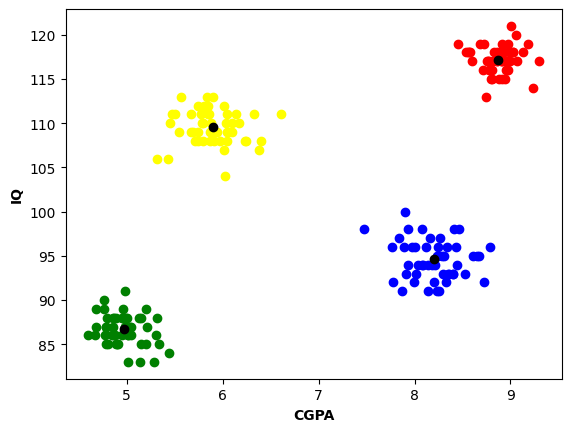

In [14]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], color='blue')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], color='red')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], color='green')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], color='yellow')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black')
plt.xlabel('CGPA', weight='bold')
plt.ylabel('IQ', weight='bold')
plt.show();

## **K-Means on 3D Data**

In [15]:
from sklearn.datasets import make_blobs

In [16]:
centroids = [(-5, -5, 5), (5, 5, -5), (3.5, -2.5, 4), (-2.5, 2.5, -4)]
cluster_std = [1,1,1,1]

In [17]:
X, y = make_blobs(n_samples=200, cluster_std=cluster_std, centers=centroids, n_features=3, random_state=1)

In [18]:
X

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935,  4.14048406],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314,  4.37999916],
       [ 4.91549197,  4.70263812, -4.582698  ],
       [-3.80108212, -4.81484358,  4.62471505],
       [ 4.6735005 ,  3.65732421, -3.88561702],
       [-6.23005814, -4.4494625 ,  5.79280687],
       [-3.90232915,  2.95112294, -4.6949209 ],
       [ 3.72744124,  5.31354772, -4.49681519],
       [-3.3088472 ,  3.05743945, -3.81896126],
       [ 2.70273021, -2.21732429,  3.17390257],
       [ 4.06438286, -0.36217193,  3.214466  ],
       [ 4.69268607, -2.73794194,  5.15528789],
       [ 4.1210827 , -1.5438783 ,  3.29415949],
       [-6.61577235, -3.87858229,  5.408

In [19]:
import plotly.express as px

In [20]:
fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2])
fig.show();

### **Output**
In case if it is not shown on GitHub
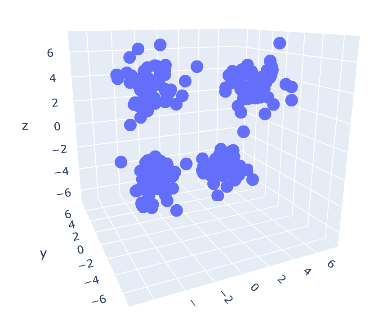

In [21]:
wcss = []
for i in range(1, 21):
  km = KMeans(n_clusters=i)
  km.fit_predict(X)
  wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

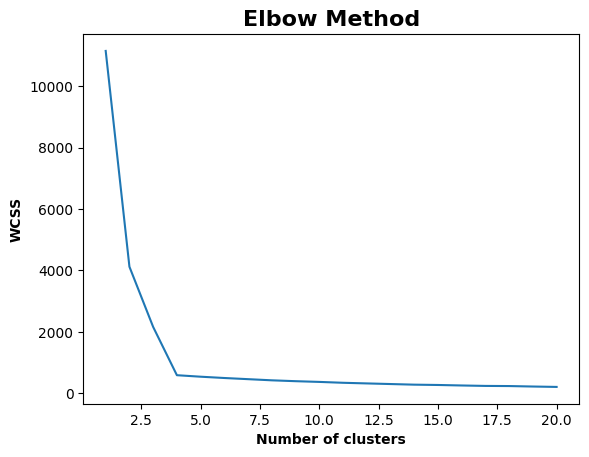

In [22]:
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method', weight='bold', fontsize=16)
plt.xlabel('Number of clusters', weight='bold')
plt.ylabel('WCSS', weight='bold')
plt.show();

In [23]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [24]:
df_new = pd.DataFrame()
df_new['col1'] = X[:, 0]
df_new['col2'] = X[:, 1]
df_new['col3'] = X[:, 2]
df_new['label'] = y_pred

In [25]:
fig = px.scatter_3d(df_new, x='col1', y='col2', z='col3', color='label')
fig.show();

### **Output**
In case if is not shown on my GitHub
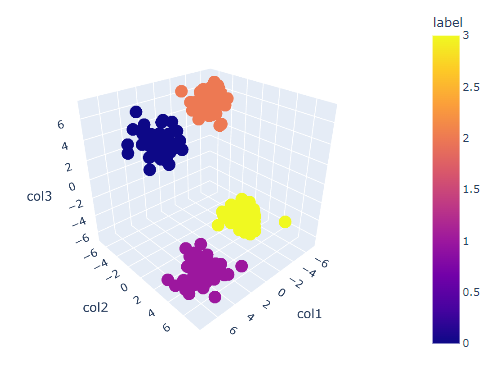

### **With Coordinates values**
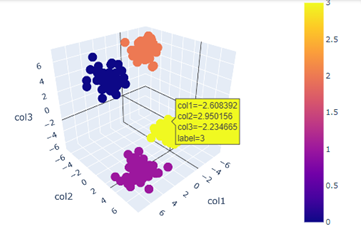


# **The End :)**